# Cosmic Watch Data Analysis

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch.

In [1]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.


data = pd.read_csv('CW_A2023_Jul_19_092453.csv')

data

,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,3973,387,81.05,928,27.34
1,2,32506,345,64.98,6276,27.34
2,3,61538,432,101.61,11621,27.34
3,4,64372,188,32.01,12180,27.34
4,5,76314,492,134.92,14382,27.34
...,...,...,...,...,...,...
19281,19282,171267571,255,43.96,32067048,27.67
19282,19283,171268965,409,91.12,32067240,27.67
19283,19284,171270280,396,85.28,32067618,27.45
19284,19285,171280562,399,87.30,32069486,27.45


Next we are going to plot a hystogram of the event voltages, in part to see that the data was importated correctly, and also to see how it compares to other data sets.

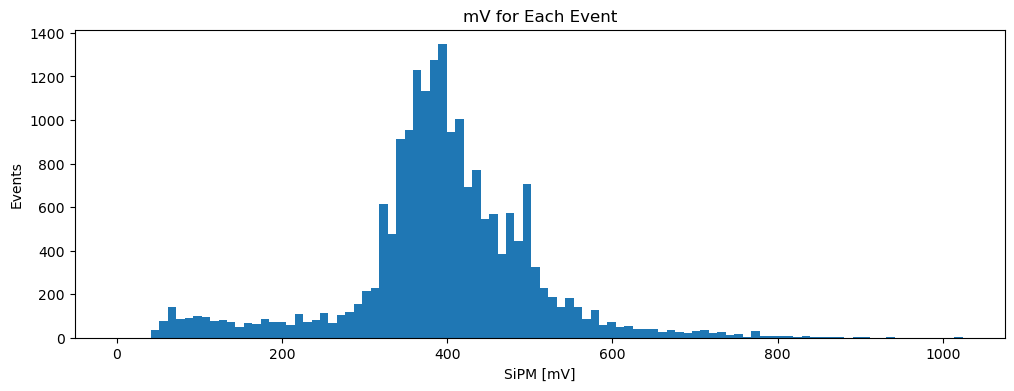

In [2]:
# This makes a histogram of that totally useless calculation above
plt.figure(figsize=(12,4))
plt.hist(data.ADC, bins=100, range=[0,1024], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");

It takes time for the CosmicWatch's processor to evaluate and report on events, this time is considered down time. The system reports out the down time, we need to use this to calculate the up time, the time when the Cosmic Watch was waiting for a hit. Using the up time we can calculate a rate for every event.

In [3]:
data['UpTime'] = (data.RunTime - data.DownTime)
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
data['Minute']= (data.UpTime/(60000))
data.Minute = (data.Minute).astype(int)
data['avgRate'] = data.Event/(data.UpTime/1000)
data

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,3973,387,81.05,928,27.34,3045,0 days 00:00:03.045000,0,0.328407
1,2,32506,345,64.98,6276,27.34,26230,0 days 00:00:26.230000,0,0.076249
2,3,61538,432,101.61,11621,27.34,49917,0 days 00:00:49.917000,0,0.060100
3,4,64372,188,32.01,12180,27.34,52192,0 days 00:00:52.192000,0,0.076640
4,5,76314,492,134.92,14382,27.34,61932,0 days 00:01:01.932000,1,0.080734
...,...,...,...,...,...,...,...,...,...,...
19281,19282,171267571,255,43.96,32067048,27.67,139200523,1 days 14:40:00.523000,2320,0.138520
19282,19283,171268965,409,91.12,32067240,27.67,139201725,1 days 14:40:01.725000,2320,0.138526
19283,19284,171270280,396,85.28,32067618,27.45,139202662,1 days 14:40:02.662000,2320,0.138532
19284,19285,171280562,399,87.30,32069486,27.45,139211076,1 days 14:40:11.076000,2320,0.138531


In [4]:
Data1Min = data.drop_duplicates(subset=['Minute'], keep='first')
Data1Min = Data1Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,3973,928,3045,0 days 00:00:03.045000,0,0.328407
4,5,76314,14382,61932,0 days 00:01:01.932000,1,0.080734
12,13,150560,28057,122503,0 days 00:02:02.503000,2,0.106120
23,24,234977,43625,191352,0 days 00:03:11.352000,3,0.125423
29,30,302218,56267,245951,0 days 00:04:05.951000,4,0.121976
...,...,...,...,...,...,...,...
19243,19244,170988228,32014678,138973550,1 days 14:36:13.550000,2316,0.138472
19254,19255,171050226,32026320,139023906,1 days 14:37:03.906000,2317,0.138501
19263,19264,171139245,32042974,139096271,1 days 14:38:16.271000,2318,0.138494
19267,19268,171193659,32053110,139140549,1 days 14:39:00.549000,2319,0.138479


In [5]:
Data1Min['DeltaCount'] = Data1Min.Event - Data1Min.Event.shift(1)

Data1Min['DeltaUpTime'] = Data1Min.UpTime - Data1Min.UpTime.shift(1)

Data1Min['Rate'] = Data1Min.DeltaCount / (Data1Min.DeltaUpTime /1000)
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,3973,928,3045,0 days 00:00:03.045000,0,0.328407,NaN,NaN,NaN
4,5,76314,14382,61932,0 days 00:01:01.932000,1,0.080734,4.0,58887.0,0.067927
12,13,150560,28057,122503,0 days 00:02:02.503000,2,0.106120,8.0,60571.0,0.132076
23,24,234977,43625,191352,0 days 00:03:11.352000,3,0.125423,11.0,68849.0,0.159770
29,30,302218,56267,245951,0 days 00:04:05.951000,4,0.121976,6.0,54599.0,0.109892
...,...,...,...,...,...,...,...,...,...,...
19243,19244,170988228,32014678,138973550,1 days 14:36:13.550000,2316,0.138472,4.0,71861.0,0.055663
19254,19255,171050226,32026320,139023906,1 days 14:37:03.906000,2317,0.138501,11.0,50356.0,0.218445
19263,19264,171139245,32042974,139096271,1 days 14:38:16.271000,2318,0.138494,9.0,72365.0,0.124370
19267,19268,171193659,32053110,139140549,1 days 14:39:00.549000,2319,0.138479,4.0,44278.0,0.090338


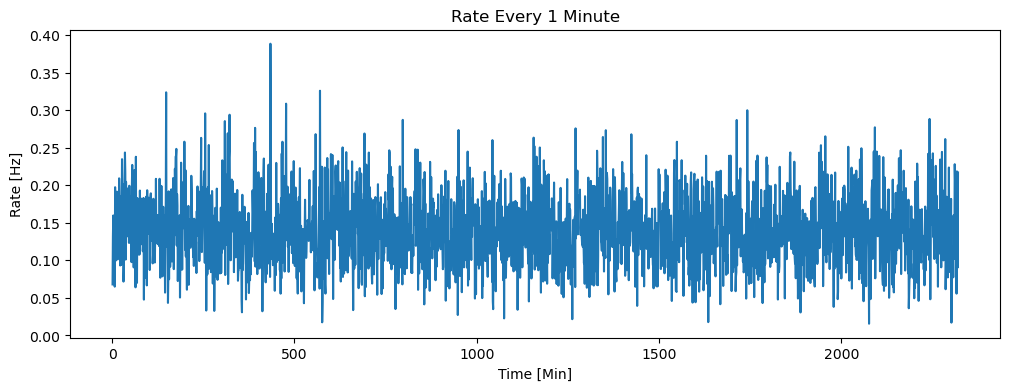

In [6]:
plt.figure(figsize=(12,4))
plt.plot(Data1Min.Minute,Data1Min.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

In [7]:
#Data5Min = pd.DataFrame(columns=['Event','DownTime','Uptime','Minute'])
Data5Min = Data1Min.query('Minute % 5 == 0')

Data5Min = Data5Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,3973,928,3045,0 days 00:00:03.045000,0,0.328407
33,34,372908,69191,303717,0 days 00:05:03.717000,5,0.111946
76,77,747423,138855,608568,0 days 00:10:08.568000,10,0.126527
118,119,1128663,209477,919186,0 days 00:15:19.186000,15,0.129462
166,167,1477405,274403,1203002,0 days 00:20:03.002000,20,0.138819
...,...,...,...,...,...,...,...
19121,19122,169791657,31790120,138001537,1 days 14:20:01.537000,2300,0.138564
19155,19156,170172784,31861464,138311320,1 days 14:25:11.320000,2305,0.138499
19189,19190,170551219,31932518,138618701,1 days 14:30:18.701000,2310,0.138437
19239,19240,170899623,31997934,138901689,1 days 14:35:01.689000,2315,0.138515


In [8]:
Data5Min['DeltaCount'] = Data5Min.Event - Data5Min.Event.shift(1)
Data5Min['DeltaUpTime'] = Data5Min.UpTime - Data5Min.UpTime.shift(1)
Data5Min['Rate'] = Data5Min.DeltaCount / (Data5Min.DeltaUpTime /1000)


Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,3973,928,3045,0 days 00:00:03.045000,0,0.328407,NaN,NaN,NaN
33,34,372908,69191,303717,0 days 00:05:03.717000,5,0.111946,33.0,300672.0,0.109754
76,77,747423,138855,608568,0 days 00:10:08.568000,10,0.126527,43.0,304851.0,0.141053
118,119,1128663,209477,919186,0 days 00:15:19.186000,15,0.129462,42.0,310618.0,0.135214
166,167,1477405,274403,1203002,0 days 00:20:03.002000,20,0.138819,48.0,283816.0,0.169124
...,...,...,...,...,...,...,...,...,...,...
19121,19122,169791657,31790120,138001537,1 days 14:20:01.537000,2300,0.138564,34.0,296806.0,0.114553
19155,19156,170172784,31861464,138311320,1 days 14:25:11.320000,2305,0.138499,34.0,309783.0,0.109754
19189,19190,170551219,31932518,138618701,1 days 14:30:18.701000,2310,0.138437,34.0,307381.0,0.110612
19239,19240,170899623,31997934,138901689,1 days 14:35:01.689000,2315,0.138515,50.0,282988.0,0.176686


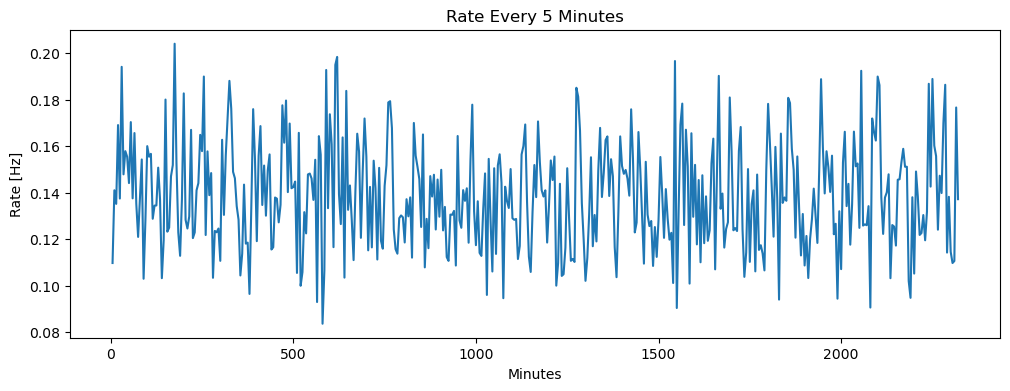

In [9]:
plt.figure(figsize=(12,4))
plt.plot(Data5Min.Minute,Data5Min.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

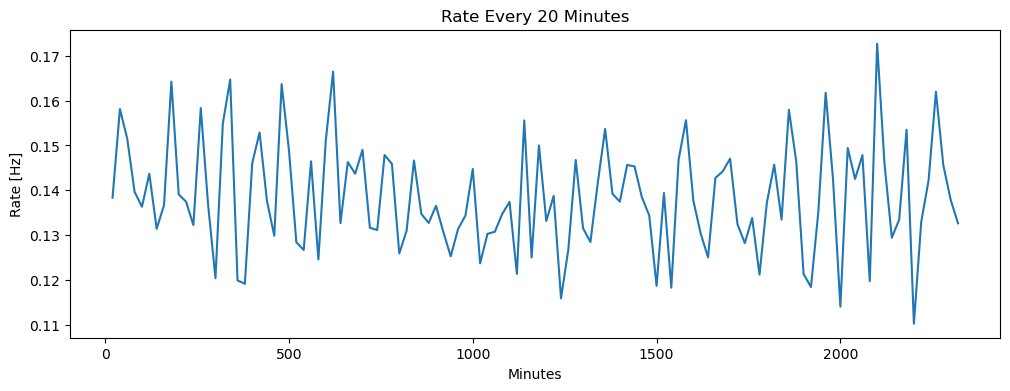

In [10]:
Data20Min = Data1Min.query('Minute % 20 == 0')

Data20Min = Data20Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data20Min['DeltaCount'] = Data20Min.Event - Data20Min.Event.shift(1)

Data20Min['DeltaUpTime'] = Data20Min.UpTime - Data20Min.UpTime.shift(1)

Data20Min['Rate'] = Data20Min.DeltaCount / (Data20Min.DeltaUpTime /1000)

plt.figure(figsize=(12,4))
plt.plot(Data20Min.Minute,Data20Min.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");